In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px
import pandas as pd
import MDAnalysis as mda

import numpy as np
import plumed
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.cluster import KMeans

In [4]:
# Devo prima creare un array con tutti i valori assunti dalla variabile collettiva
data_colvar0 = plumed.read_as_pandas("data/COLVAR.0")
data_colvar1 = plumed.read_as_pandas("data/COLVAR.1")
data_colvar2 = plumed.read_as_pandas("data/COLVAR.2")
data_colvar3 = plumed.read_as_pandas("data/COLVAR.3")

# Import data from the files containing the coordination number 
coord0 = plumed.read_as_pandas("coord/COORD_0")
coord1 = plumed.read_as_pandas("coord/COORD_1")
coord2 = plumed.read_as_pandas("coord/COORD_2")
coord3 = plumed.read_as_pandas("coord/COORD_3")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:2: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:3: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:4: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:5: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:8: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3656/1917337666.py:9: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn

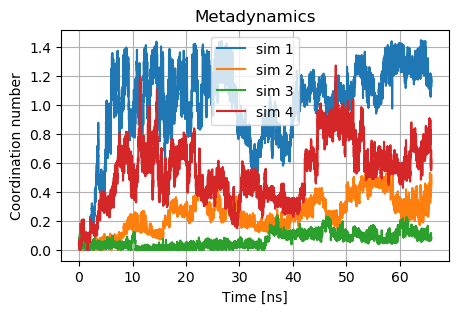

In [5]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(coord0["time"]*0.01, coord0["d1"], label="sim 1")
plt.plot(coord1["time"]*0.01, coord1["d1"], label="sim 2")
plt.plot(coord2["time"]*0.01, coord2["d1"], label="sim 3")
plt.plot(coord3["time"]*0.01, coord3["d1"], label="sim 4")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Coordination number")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

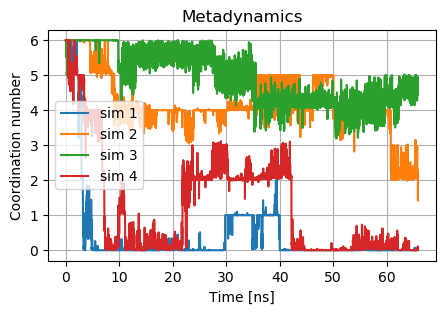

In [16]:
plt.plot(coord0["time"]*0.01, coord0["coord"], label="sim 1")
plt.plot(coord1["time"]*0.01, coord1["coord"], label="sim 2")
plt.plot(coord2["time"]*0.01, coord2["coord"], label="sim 3")
plt.plot(coord3["time"]*0.01, coord3["coord"], label="sim 4")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Coordination number")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

In [7]:
# Attenzione: il COLVAR è campionato ad una frequenza diversa rispetto al COORD
# L'idea più semplice a questo punto è prendere le distanze salvate in COORD (e non su COLVAR)

# Seleziono configurazioni più vicine a [0.05, 0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1]

# Recover the distances

def find_closest_elements(array, numbers):
    result = []

    for num in numbers:
        # Find the index of the element in the array that is closest to num
        index = np.argmin(np.abs(np.array(array) - num))
        result.append((index, array[index]))

    return result

# Example usage:
# create the array containing all the values of the CV (called s)
labels_sim = np.concatenate((np.zeros(len(coord0["d1"])), np.ones(len(coord1["d1"])), 2*np.ones(len(coord2["d1"])), 3*np.ones(len(coord2["d1"]))), axis=None)
time = np.concatenate((coord0["time"], coord1["time"], coord2["time"], coord3["time"]), axis=None)
s = np.concatenate((coord0["d1"], coord1["d1"], coord2["d1"], coord3["d1"]), axis=None)
config = [0.05, 0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1]

output = find_closest_elements(s, config)

print("Closest frames:", output)

Closest frames: [(6989, 0.049989), (19700, 0.099999), (9288, 0.249995), (8957, 0.400001), (22872, 0.549941), (21759, 0.7000029999999999), (24375, 0.850042), (819, 1.0000069999999999)]


In [15]:
frames = []
for i in range(len(output)):
    frames.append(output[i][0])

In [23]:
10*(frames - labels_sim[frames]*len(s)/4)

array([ 4020., 65260., 27010., 23700., 31110., 19980., 46140.,  8190.])

In [22]:
labels_sim[frames]

array([1., 2., 1., 1., 3., 3., 3., 0.])